# Descriptive Analysis of the data

In [1]:
# load setup.py file
%run setup.py
pd.set_option('display.max_rows', 10)
# pd.options.plotting.backend = "plotly"

df_invited = pd.read_csv('factInvited.csv')
df_proceedings = pd.read_csv('factProceedings.csv')
df = df_invited.append(df_proceedings, ignore_index=True)

In [2]:
pd.set_option('display.max_rows', None)

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,Paper Count,Max Paper Count,First year paper,Age,Conference (long),Main Topic,Productivity
0,Gary L. Baldwi,2004.0,ASPDAC,Gary,L.,Baldwi,M,4.0,4.0,1962.0,42.0,Asia and South Pacific Design Automation Confe...,Computer Architecture,0.095238
1,Rudy Lauwereins,2004.0,ASPDAC,Rudy,NaN,Lauwereins,M,112.0,196.0,1987.0,17.0,Asia and South Pacific Design Automation Confe...,Computer Architecture,6.588235
2,Rajeev Madhavan,2005.0,ASPDAC,Rajeev,NaN,Madhavan,M,5.0,5.0,1994.0,11.0,Asia and South Pacific Design Automation Confe...,Computer Architecture,0.454545
3,Jan M. Rabaey,2005.0,ASPDAC,Jan,M.,Rabaey,M,146.0,321.0,1985.0,20.0,Asia and South Pacific Design Automation Confe...,Computer Architecture,7.300000
4,Alberto Sangiovanni-Vincentelli,2006.0,ASPDAC,Alberto,NaN,Sangiovanni-Vincentelli,M,457.0,689.0,1973.0,33.0,Asia and South Pacific Design Automation Confe...,Computer Architecture,13.848485
5,Satoru Ito,2006.0,ASPDAC,Satoru,NaN,Ito,M,3.0,3.0,2000.0,6.0,Asia and South Pacific Design Automation Confe...,Computer Architecture,0.500000
6,Rob Rutenbar,2007.0,ASPDAC,Rob,NaN,Rutenbar,M,114.0,171.0,1981.0,26.0,Asia and South Pacific Design Automation Confe...,Computer Architecture,4.384615
7,Jan M. Rabaey,2008.0,ASPDAC,Jan,M.,Rabaey,M,185.0,321.0,1985.0,23.0,Asia and South Pacific Design Automation Confe...,Computer Architecture,8.043478
8,Mitsuo Saito,2009.0,ASPDAC,Mitsuo,NaN,Saito,M,7.0,7.0,1985.0,24.0,Asia and South Pacific Design Automation Confe...,Computer Architecture,0.291667
9,Wolfgang Rosenstiel,2009.0,ASPDAC,Wolfgang,NaN,Rosenstiel,M,261.0,471.0,1981.0,28.0,Asia and South Pacific Design Automation Confe...,Computer Architecture,9.321429


## Invited Speakers

In [3]:
print("Number of rows in factInvited.csv: ", df_invited.shape[0])
print("Number of unique invited speakers: ", df_invited['Full name'].nunique())
print("Columns:",list(df_invited.columns))

Number of rows in factInvited.csv:  1334
Number of unique invited speakers:  1150
Columns: ['Full name', 'Year', 'Conference (short)', 'First name', 'Middle name', 'Last name', 'gender', 'Paper Count', 'Max Paper Count', 'First year paper', 'Age', 'Conference (long)', 'Main Topic', 'Productivity']


In [8]:
df_invited[df_invited['Conference (short)'] == "AAAI"].groupby('Year').size()

Year
2004.0    10
2005.0    10
2006.0     6
2007.0     8
2008.0     9
2010.0     8
2011.0     7
2012.0    10
2013.0    10
2014.0     7
2015.0    10
2016.0    12
2017.0     8
2018.0     5
2019.0     8
2020.0    17
2021.0     6
2022.0    11
dtype: int64

<AxesSubplot: title={'center': 'Number of Invited Speakers per Field of Study'}, xlabel='Number of Inivted Speakers'>

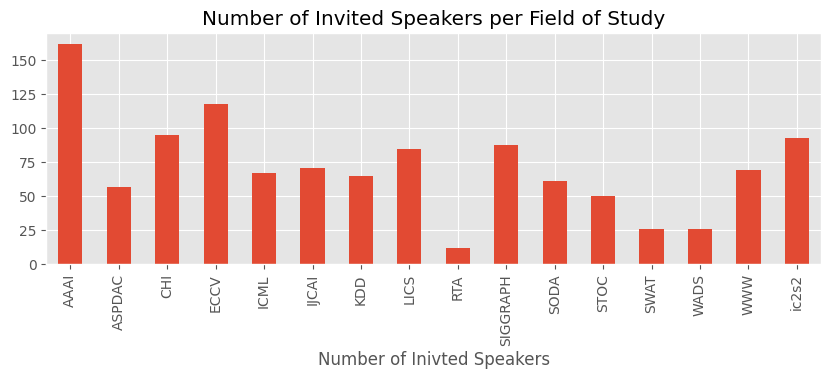

In [7]:
df_invited['Conference (short)'].value_counts().sort_index().plot(kind='bar',
                                                     title='Number of Invited Speakers per Field of Study',
                                                     figsize=(10,3),
                                                     xlabel='Number of Inivted Speakers')


<AxesSubplot: title={'center': 'Number of Invited Speakers per Field of Study'}, xlabel='Number of Inivted Speakers'>

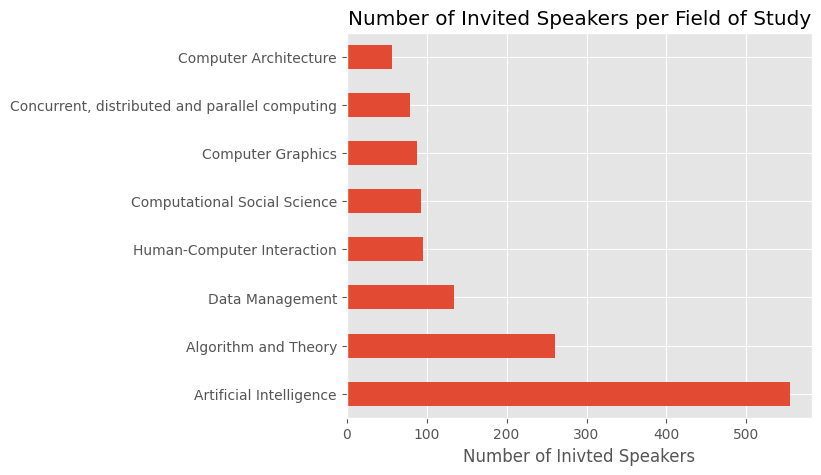

In [26]:
df_invited['Main Topic'].value_counts().plot(kind='barh',
                                                     title='Number of Invited Speakers per Field of Study',
                                                     figsize=(6,5),
                                                     xlabel='Number of Inivted Speakers')


In [8]:
plt.bar(df_invited['Conference (short)'].value_counts()

AAAI      188
ECCV      118
WoLLIC    110
CHI        95
ic2s2      93
         ... 
STOC       50
SWAT       26
WADS       26
SC         19
RTA        12
Name: Conference (short), Length: 19, dtype: int64

In [14]:
df.groupby('Full name')['Full name'].count().sort_values(ascending=False).head(10)

Full name
Jiawei Han      155
Qiang Yang      145
Yang Liu        143
Wei Wang        133
Philip S. Yu    132
Heng Huang      130
Hui Xiong       117
Jun Wang        115
Wei Zhang       112
Wei Liu         105
Name: Full name, dtype: int64

In [4]:
# Count the number of "M" and "F" in df_invited
df_invited.groupby('gender').size()

gender
F    279
M    866
dtype: int64

In [6]:
len(df_invited)

1334

In [4]:
df1 = df_invited[['Year','gender']].value_counts().reset_index(name="counts").sort_values(by=['Year'], ascending=False)
fig = px.line(df1, x='Year', y = 'counts', color = 'gender', title="Number of Invited Speakers each Year")

fig.show()

In [5]:
df_invited.groupby(['Full name','gender']).size().sort_values(ascending=False).head(10)

Full name           gender
Tim Berners-Lee     M         15
Michael Kearns      M          7
Prabhakar Raghavan  M          6
Daphne Koller       F          5
Kristen Grauman     M          5
Yann LeCun          M          5
Jon Kleinberg       M          5
Sebastian Thrun     M          5
Cynthia Dwork       F          5
David Ferrucci      M          5
dtype: int64